# Gráficas de tiempo y relaciones

/tmp/ipython-input-3-541790916.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("cool", len(metodos))  # dividimos en N colores
/tmp/ipython-input-3-541790916.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("winter", len(metodos))  # dividimos en N colores


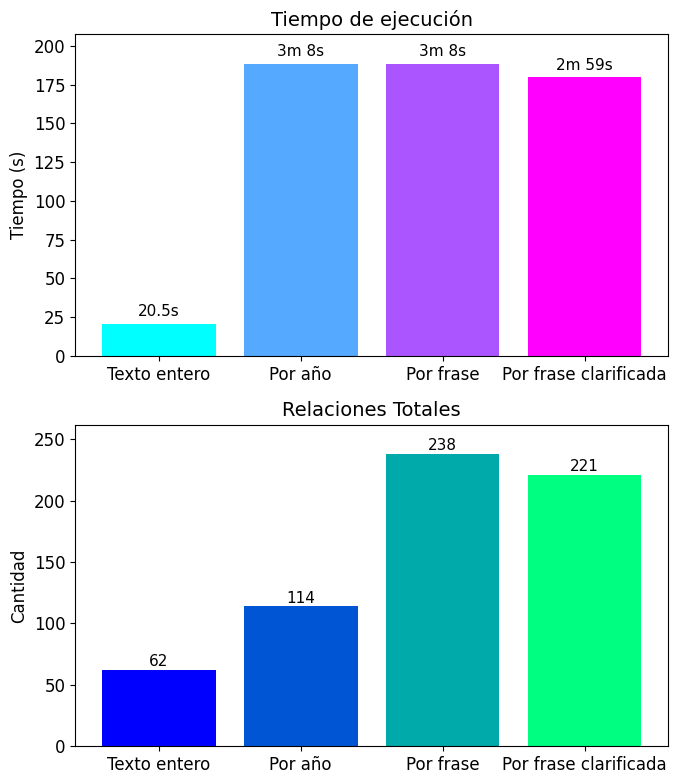

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
tiempos = [20.5, 188.6, 188.3, 179.7]  # segundos
relaciones = [62, 114, 238, 221]

# Función para formatear tiempo
def format_time(seconds):
    if seconds < 60:
        return f"{seconds:.1f}s"
    m = int(seconds // 60)
    s = int(seconds % 60)
    return f"{m}m {s}s"

colormap = cm.get_cmap("cool", len(metodos))  # dividimos en N colores
colores_tiempo = [colormap(i) for i in range(len(metodos))]

colormap = cm.get_cmap("winter", len(metodos))  # dividimos en N colores
colores_relaciones = [colormap(i) for i in range(len(metodos))]

# Crear figura con dos subgráficos de barras lado a lado
fig, axs = plt.subplots(2, 1, figsize=(7, 8))
plt.rcParams.update({'font.size': 12})

# Gráfico 1: Tiempo de ejecución
axs[0].bar(metodos, tiempos, color=colores_tiempo)
axs[0].set_title("Tiempo de ejecución", fontsize=14)
axs[0].set_ylabel("Tiempo (s)", fontsize=12)
axs[0].set_ylim(0, max(tiempos) * 1.1)
for i, t in enumerate(tiempos):
    axs[0].text(i, t+5, format_time(t), ha='center', fontsize=11)

# Gráfico 2: Relaciones totales
axs[1].bar(metodos, relaciones, color=colores_relaciones)
axs[1].set_title("Relaciones Totales", fontsize=14)
axs[1].set_ylabel("Cantidad", fontsize=12)
axs[1].set_ylim(0, max(relaciones) * 1.1)
for i, r in enumerate(relaciones):
    axs[1].text(i, r + 3, str(r), ha='center', fontsize=11)

# Ajustar el diseño general
plt.tight_layout()
plt.savefig("tiempo_relaciones.png")
plt.show()


# Gráfica de precisión, recall y f1score comparando todos los enfoques de prompting

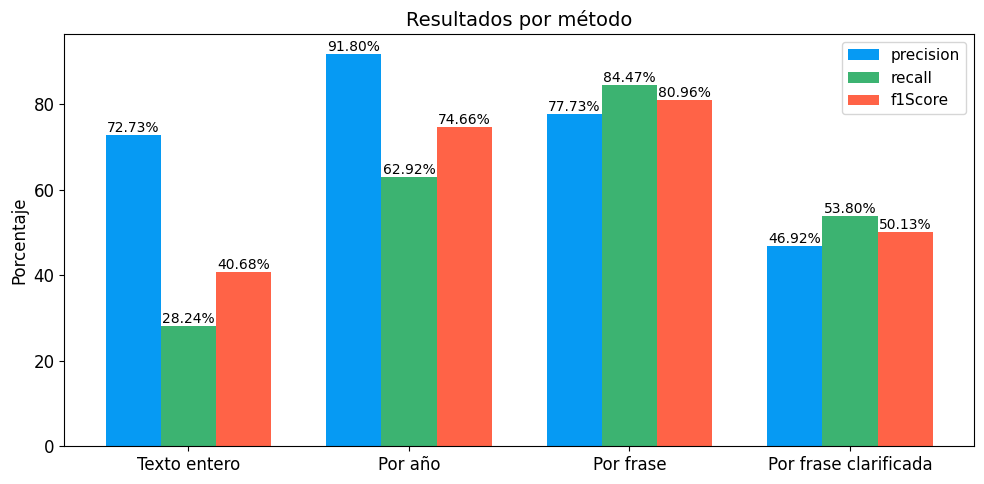

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
metodos = ["Texto entero", "Por año", "Por frase", "Por frase clarificada"]
precision_scores = [72.73, 91.80, 77.73, 46.92]
recall_scores = [28.24, 62.92, 84.47, 53.80]
f1_scores = [40.68, 74.66, 80.96, 50.13]

# Posiciones de las barras
x = np.arange(len(metodos))
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams.update({'font.size': 12})

# Gráfico de barras
bars1 = ax.bar(x - width, precision_scores, width, label='precision', color='xkcd:azure')
bars2 = ax.bar(x, recall_scores, width, label='recall', color='mediumseagreen')
bars3 = ax.bar(x + width, f1_scores, width, label='f1Score', color='tomato')

# Etiquetas y título
ax.set_ylabel('Porcentaje', fontsize=12)
ax.set_title('Resultados por método', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.legend(fontsize=11)

# Añadir valores encima de las barras
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("results_per_method.png")
plt.show()


# Gráfica comparando todos los modelos

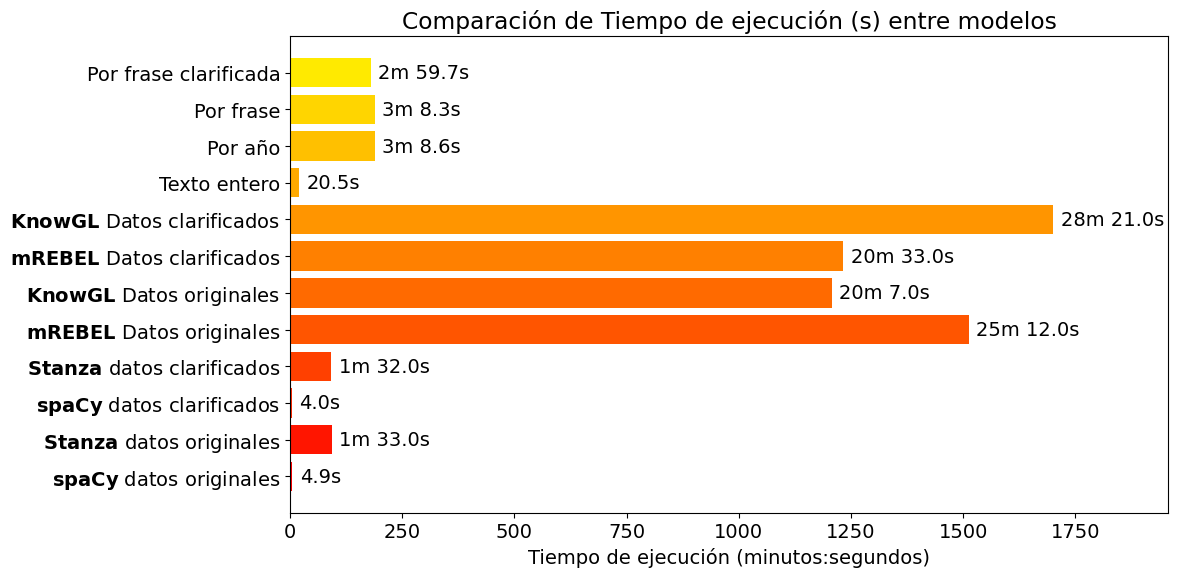

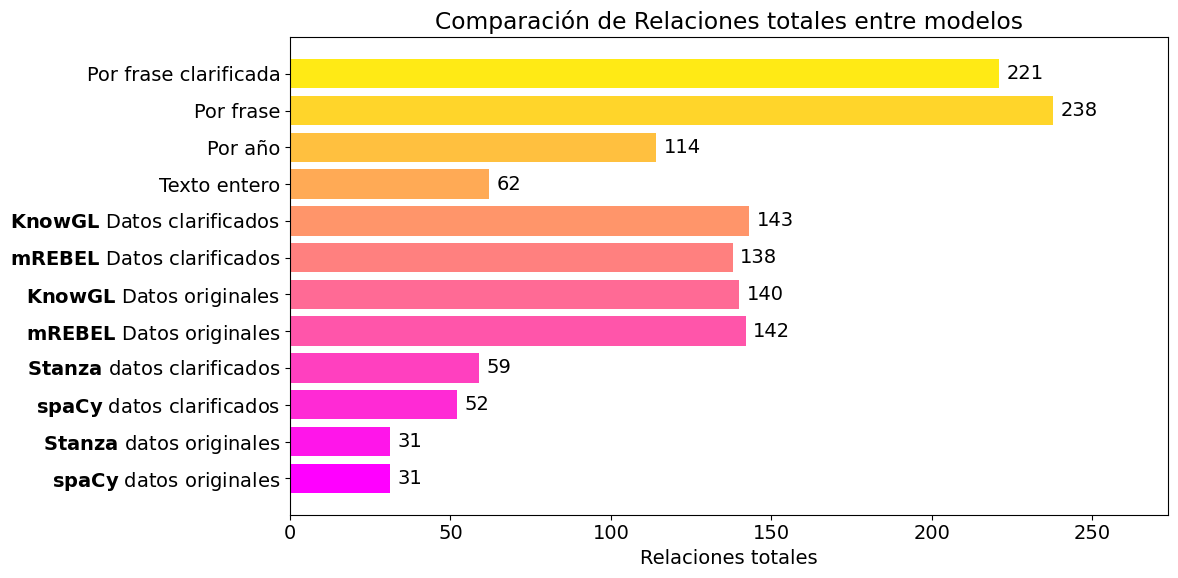

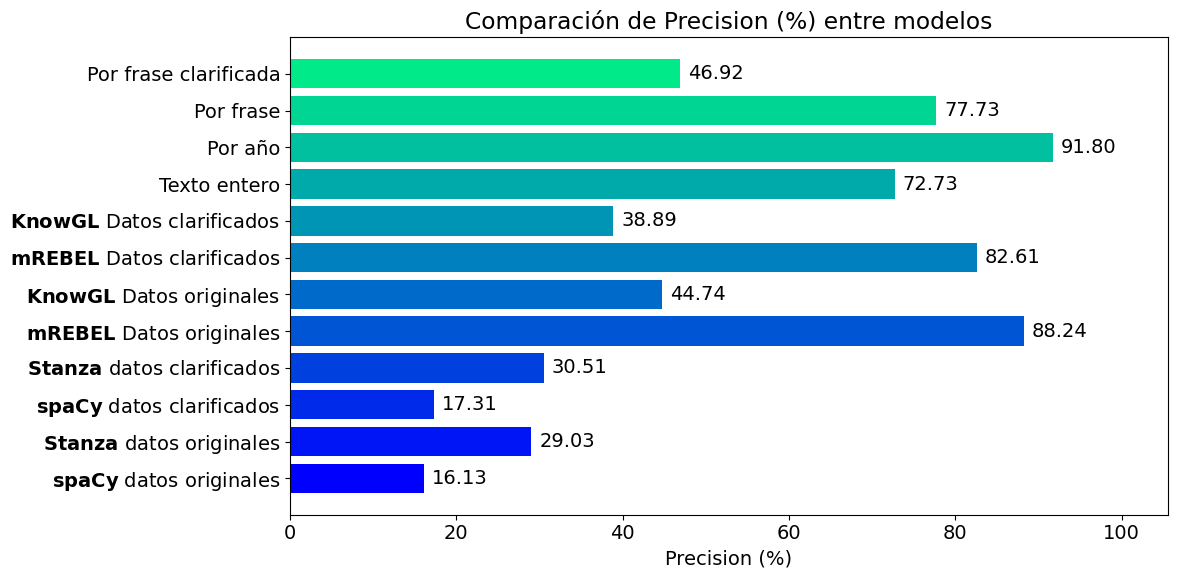

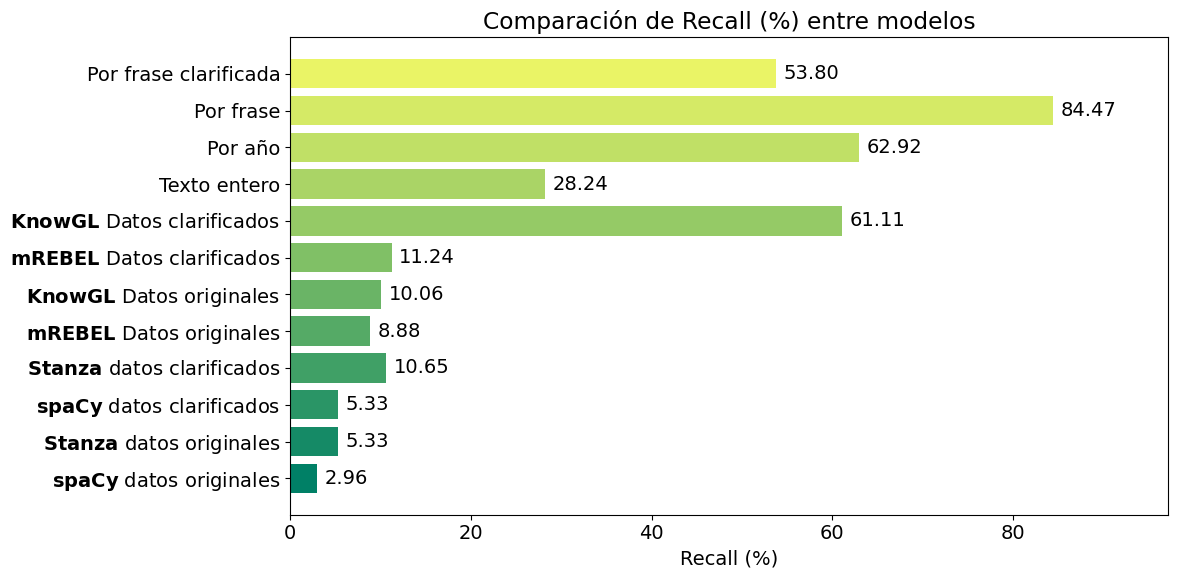

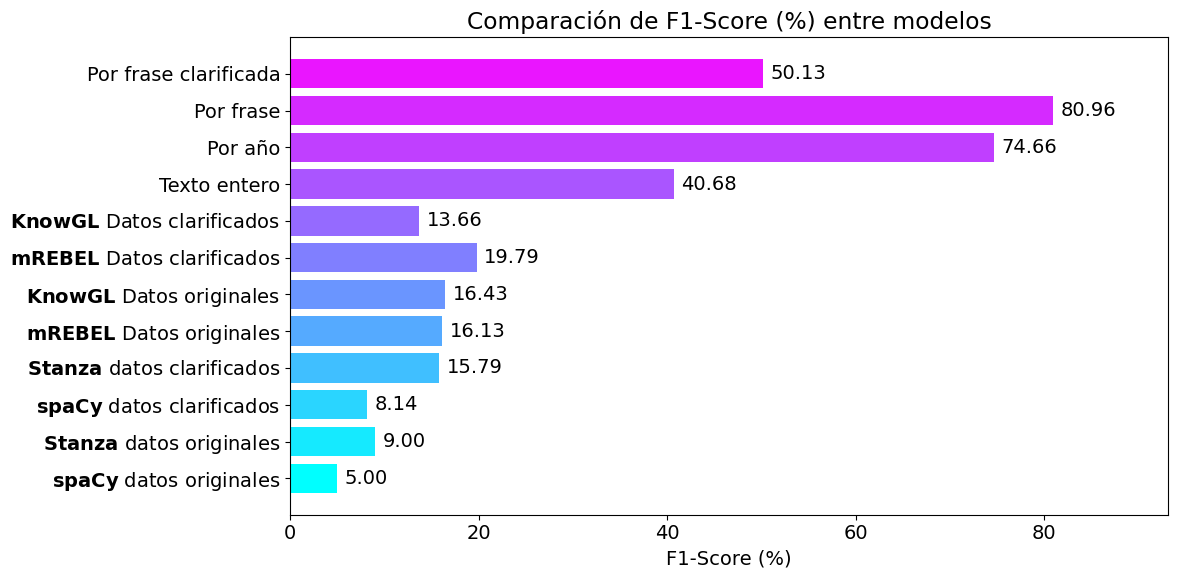

In [20]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np

plt.rcParams['font.size'] = 14

# Datos
metodos = [
    r'$\mathbf{spaCy}$ datos originales', r'$\mathbf{Stanza}$ datos originales',
    r'$\mathbf{spaCy}$ datos clarificados', r'$\mathbf{Stanza}$ datos clarificados',
    r'$\mathbf{mREBEL}$ Datos originales', r'$\mathbf{KnowGL}$ Datos originales',
    r'$\mathbf{mREBEL}$ Datos clarificados', r'$\mathbf{KnowGL}$ Datos clarificados',
    'Texto entero', 'Por año', 'Por frase', 'Por frase clarificada'
]

# Conversión de tiempos a segundos aproximados
tiempos = [4.9, 93, 4.04, 92, 1512, 1207, 1233, 1701, 20.5, 188.6, 188.3, 179.7]
relaciones = [31, 31, 52, 59, 142, 140, 138, 143, 62, 114, 238, 221]
precision = [16.13, 29.03, 17.31, 30.51, 88.24, 44.74, 82.61, 38.89, 72.73, 91.80, 77.73, 46.92]
recall = [2.96, 5.33, 5.33, 10.65, 8.88, 10.06, 11.24, 61.11, 28.24, 62.92, 84.47, 53.80]
f1_score = [5.00, 9.00, 8.14, 15.79, 16.13, 16.43, 19.79, 13.66, 40.68, 74.66, 80.96, 50.13]

# Diccionario de métricas
metrics = {
    'Tiempo de ejecución (s)': tiempos,
    'Relaciones totales': relaciones,
    'Precision (%)': precision,
    'Recall (%)': recall,
    'F1-Score (%)': f1_score
}

# Colores personalizados para las barras
colores = [
    'autumn',
    'spring',
    'winter',
    'summer',
    'cool',
]

def format_time(seconds):
    """Convierte segundos a formato minutos:segundos."""
    minutes = int(seconds // 60)
    remaining_seconds = seconds % 60
    return f"{minutes}m {remaining_seconds:.1f}s" if minutes > 0 else f"{remaining_seconds:.1f}s"

# Crear las gráficas con valores sobre las barras y sin cortar etiquetas
for (metric, values), color in zip(metrics.items(), colores):
    plt.figure(figsize=(12, 6))
    
    cmap = colormaps[color]  # Ejemplo de colormap categórico

    # Crear los índices para cada barra
    indices = np.arange(len(metodos))
    bar_colors = cmap(indices / len(metodos)) 
    
    bars = plt.barh(metodos, values, color=bar_colors)
    plt.xlabel(metric if metric != 'Tiempo de ejecución (s)' else 'Tiempo de ejecución (minutos:segundos)')
    plt.title(f'Comparación de {metric} entre modelos')

    # Añadir los valores en cada barra
    for bar, value in zip(bars, values):
        width = bar.get_width()
        label = format_time(value) if metric == 'Tiempo de ejecución (s)' else f'{width:.2f}' if metric != 'Relaciones totales' else str(int(width))
        plt.text(width + max(values) * 0.01, bar.get_y() + bar.get_height() / 2,
                 label, va='center')

    # Asegurar que el límite del eje X sea suficiente para mostrar todas las etiquetas
    plt.xlim(0, max(values) * 1.15)
    plt.tight_layout()
    plt.show()
